In [9]:
%matplotlib inline
!pip install lightkurve


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [10]:
import lightkurve as lk # https://colab.research.google.com/drive/1F4_bexKlzQI8MkUH5ZpM8NzLTGcWVjkp?usp=sharing#scrollTo=fySRue9rEFH4

In [11]:
TIC = 'TIC 470710327'
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 18)
lc = sector_data.download()
lc = lk.search_lightcurve(TIC, author='SPOC', sector=18).download()
# lc = lc.remove_nans().remove_outliers()
# lc.to_fits(path='lightcurve.fits')

In [12]:
available_data_all = lk.search_lightcurve(TIC, author = 'SPOC')
available_data_all

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 17,2019,SPOC,120,470710327,0.0
1,TESS Sector 18,2019,SPOC,120,470710327,0.0
2,TESS Sector 24,2020,SPOC,120,470710327,0.0
3,TESS Sector 57,2022,SPOC,120,470710327,0.0
4,TESS Sector 58,2022,SPOC,120,470710327,0.0


<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

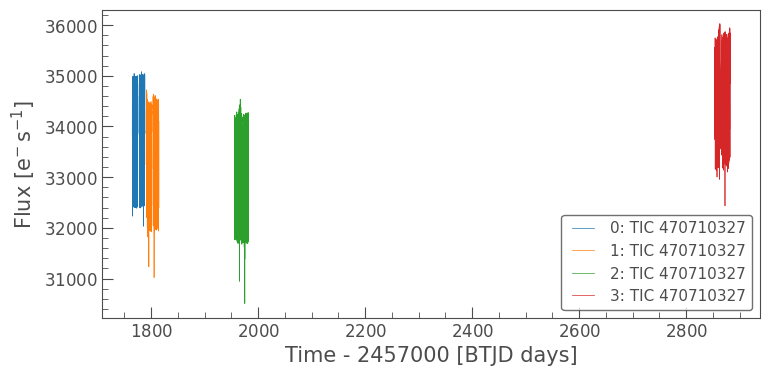

In [13]:
select_sectors = available_data_all[0:4]
lc_collection = select_sectors.download_all()
lc_collection.plot()

Now, we're going to take all these different sectors' data and stitch them together onto one plane, normalising it.

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

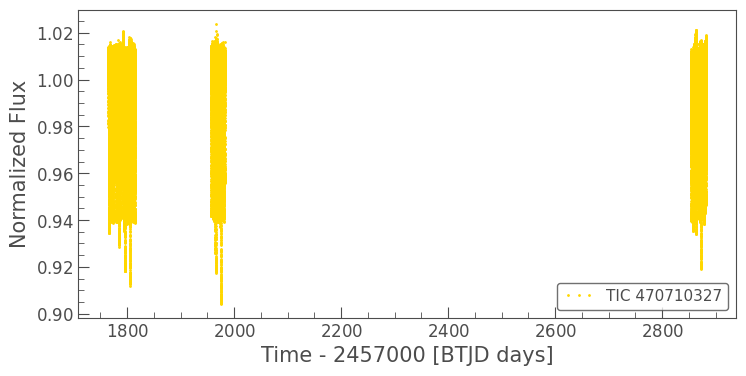

In [14]:
lc_collection_stitched = lc_collection.stitch()
lc_collection_stitched.plot(color = 'gold', lw = 0, marker = '.')

Normalisation reduces the flux to around ~1 -> normalised flux

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

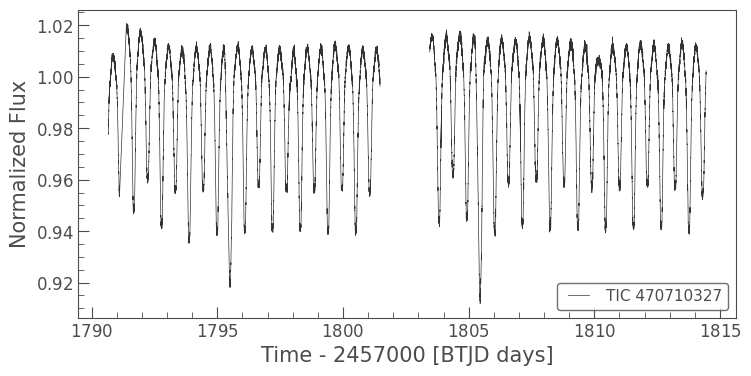

In [15]:
lc_normalize = lc.normalize() # Do this for single sectors
lc_normalize.plot()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b4c251b4-c11a-481e-8206-c29934eb75da' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>